In [ ]:
!unzip "/content/rumah_adat.zip" -d "/content"


Archive:  /content/rumah_adat.zip
   creating: /content/rumah_adat/gadang/
  inflating: /content/rumah_adat/gadang/b-1.png  
  inflating: /content/rumah_adat/gadang/b-112.png  
  inflating: /content/rumah_adat/gadang/b-117.png  
  inflating: /content/rumah_adat/gadang/b-121.png  
  inflating: /content/rumah_adat/gadang/b-14.png  
  inflating: /content/rumah_adat/gadang/b-17.png  
  inflating: /content/rumah_adat/gadang/b-24.png  
  inflating: /content/rumah_adat/gadang/b-3.png  
  inflating: /content/rumah_adat/gadang/b-35.png  
  inflating: /content/rumah_adat/gadang/b-38.png  
  inflating: /content/rumah_adat/gadang/b-42.png  
  inflating: /content/rumah_adat/gadang/b-47.png  
  inflating: /content/rumah_adat/gadang/b-49.png  
  inflating: /content/rumah_adat/gadang/b-5.png  
  inflating: /content/rumah_adat/gadang/b-53.png  
  inflating: /content/rumah_adat/gadang/b-57.png  
  inflating: /content/rumah_adat/gadang/b-7.png  
  inflating: /content/rumah_adat/gadang/b-72.png  
  inflat

In [ ]:
import os

base_dir = "/content/rumah_adat"

for kelas in os.listdir(base_dir):
    path_kelas = os.path.join(base_dir, kelas)
    if os.path.isdir(path_kelas):
        jumlah = len(os.listdir(path_kelas))
        print(f"{kelas}: {jumlah} data")


honai: 613 data
gadang: 962 data
joglo: 720 data
tongkonan: 1000 data
panjang: 624 data


# CNN

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Conv2D, MaxPooling2D, Flatten,
    Dense, Dropout, BatchNormalization
)
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [ ]:
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    validation_split=0.2   # 80% train, 20% validation
)


In [ ]:
train_gen = datagen.flow_from_directory(
    "/content/rumah_adat",
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical",
    subset="training",
    shuffle=True
)

val_gen = datagen.flow_from_directory(
    "/content/rumah_adat",
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical",
    subset="validation",
    shuffle=False
)


Found 3137 images belonging to 5 classes.
Found 782 images belonging to 5 classes.


In [ ]:
print(train_gen.class_indices)


{'gadang': 0, 'honai': 1, 'joglo': 2, 'panjang': 3, 'tongkonan': 4}


In [ ]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(5, activation='softmax')  # 5 kelas
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 222, 222, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 109, 109, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 52, 52, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    22,151,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │         1,285 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,246,853 (84.87 MB)

 Trainable params: 22,246,405 (84.86 MB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=20
)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 77s 686ms/step - accuracy: 0.3494 - loss: 12.3941 - val_accuracy: 0.1560 - val_loss: 54.6485
Epoch 2/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 62s 624ms/step - accuracy: 0.3849 - loss: 1.7793 - val_accuracy: 0.3107 - val_loss: 9.9809
Epoch 3/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 62s 623ms/step - accuracy: 0.4227 - loss: 1.5229 - val_accuracy: 0.1816 - val_loss: 4.9008
Epoch 4/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 61s 617ms/step - accuracy: 0.3899 - loss: 1.4686 - val_accuracy: 0.3747 - val_loss: 2.2995
Epoch 5/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 64s 642ms/step - accuracy: 0.5006 - loss: 1.2589 - val_accuracy: 0.4015 - val_loss: 2.6984
Epoch 6/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 62s 625ms/step - accuracy: 0.5277 - loss: 1.2653 - val_accuracy: 0.3862 - val_loss: 4.6333
Epoch 7/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 62s 623ms/step - accuracy: 0.5371 - loss: 1.2523 - val_accuracy: 0.4629 - val_loss: 1.7144
Epoch 8/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 62s 625ms/step - accuracy: 0.5309 - loss: 1.1480 - val_ac

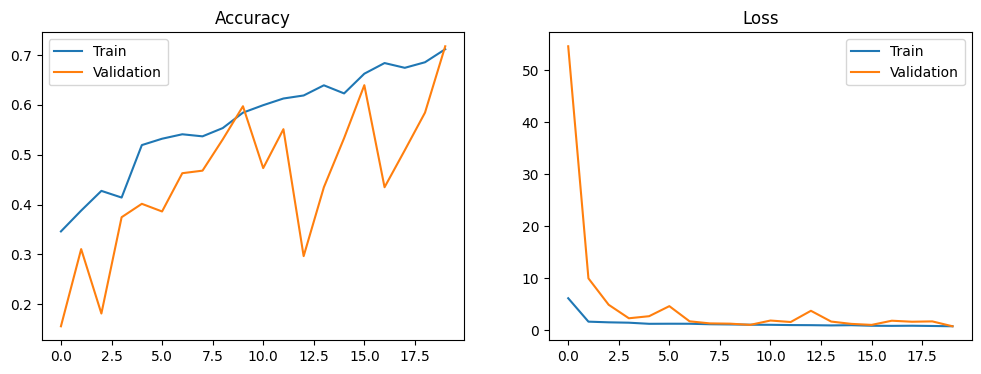

In [ ]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Loss')
plt.legend()

plt.show()


In [ ]:
val_gen.reset()
pred = model.predict(val_gen)
y_pred = np.argmax(pred, axis=1)
y_true = val_gen.classes
labels = list(val_gen.class_indices.keys())


25/25 ━━━━━━━━━━━━━━━━━━━━ 13s 489ms/step


In [ ]:
print(classification_report(y_true, y_pred, target_names=labels))


              precision    recall  f1-score   support

      gadang       0.96      0.84      0.89       192
       honai       0.95      0.52      0.67       122
       joglo       0.57      0.78      0.66       144
     panjang       0.50      0.53      0.52       124
   tongkonan       0.71      0.77      0.73       200

    accuracy                           0.71       782
   macro avg       0.74      0.69      0.69       782
weighted avg       0.75      0.71      0.71       782



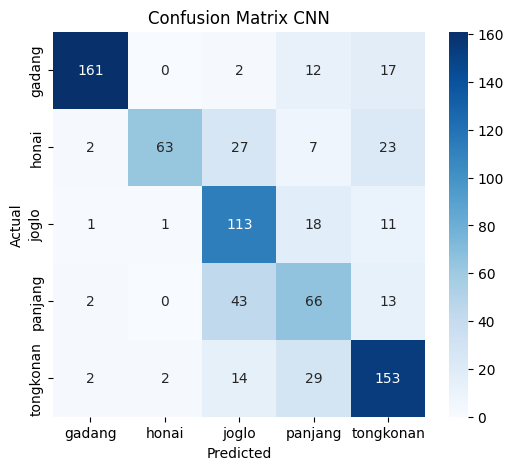

In [ ]:
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d",
            xticklabels=labels,
            yticklabels=labels,
            cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix CNN")
plt.show()


In [ ]:
model.save("cnn_rumah_adat.h5")
